In [40]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [41]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [42]:
head(df)

X Store Date       Weekly_Sales Holiday_Flag Temperature Fuel_Price CPI     
1 1 1     2010-02-05 1643691      0            42.31       2.572      211.0964
2 2 1     2010-02-12 1641957      1            38.51       2.548      211.2422
3 3 1     2010-02-19 1611968      0            39.93       2.514      211.2891
4 4 1     2010-02-26 1409728      0            46.63       2.561      211.3196
5 5 1     2010-03-05 1554807      0            46.50       2.625      211.3501
6 6 1     2010-03-12 1439542      0            57.79       2.667      211.3806
  Unemployment Weekly_CPI
1 8.106                NA
2 8.106        0.06907348
3 8.106        0.02223661
4 8.106        0.01443520
5 8.106        0.01443311
6 8.106        0.01443103

Estudando o efeito da preço do combustível

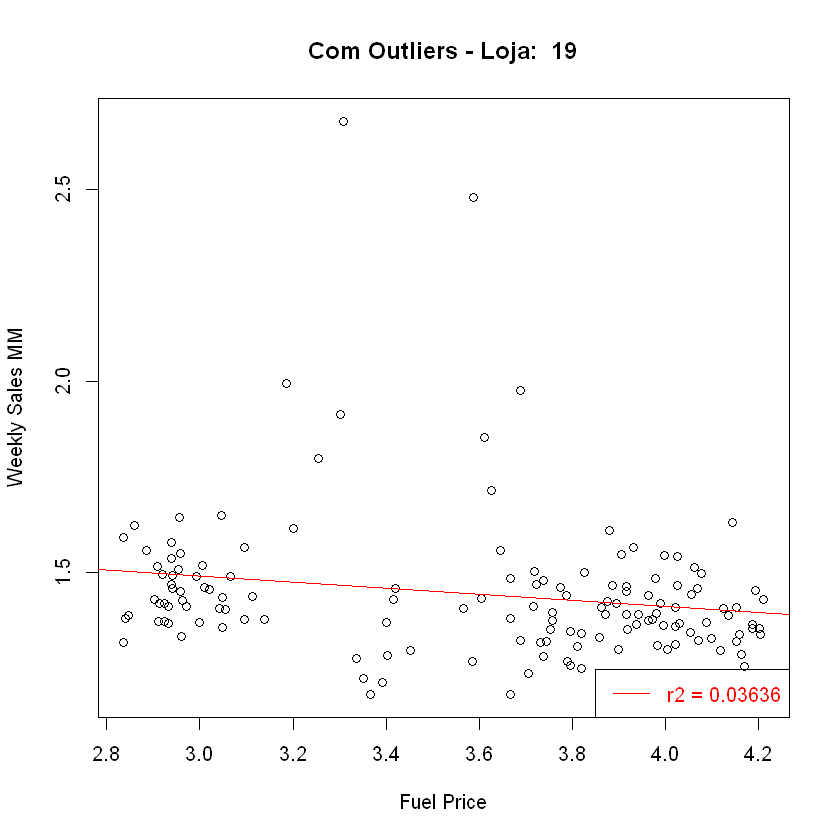

In [43]:
nstore = 19
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}


plot(dfplot$Fuel_Price	,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Fuel Price',
    main = paste( 'Com Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Fuel_Price	)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


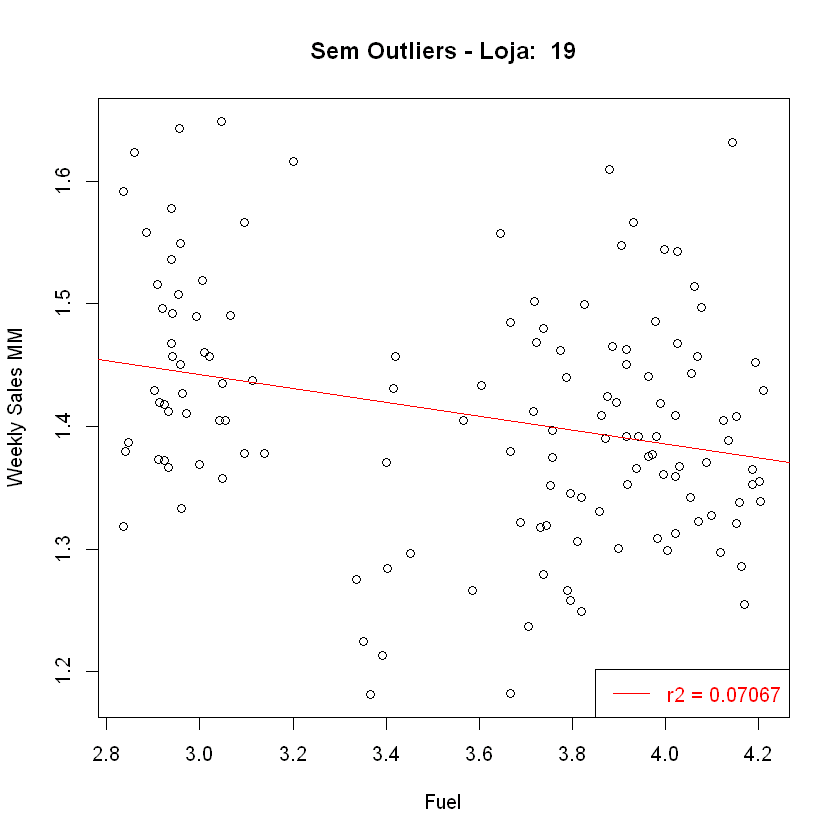

In [44]:
nstore = 19

# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}



plot(dfplot$Fuel_Price	,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Fuel',
    main = paste( 'Sem Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Fuel_Price	)
abline(lm_model, col="red")
r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


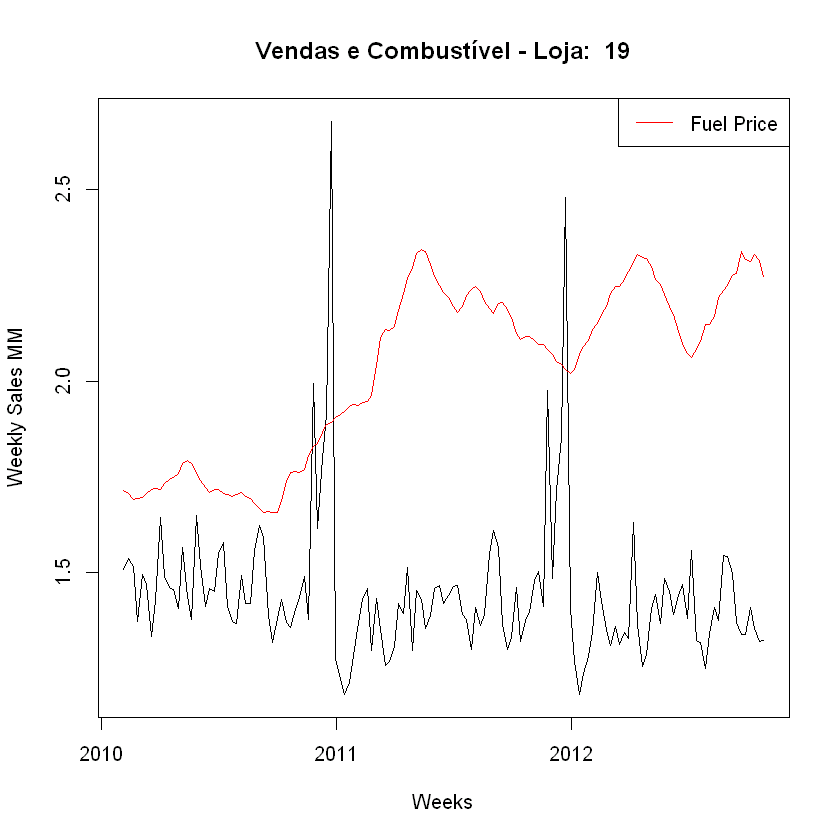

In [45]:
dfplot = df[(df$Store == nstore),]

minF = min(dfplot[dfplot$Store == nstore,]$Fuel_Price/2)
minS =  min(dfplot[dfplot$Store == nstore,]$Weekly_Sales/1000000)
minD = minF - minS


plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Weeks',
    main = paste( 'Vendas e Combustível - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Fuel_Price)/2+minD,
      col = "red")
legend("topright", legend="Fuel Price", lty=1, col="red", text.col="black")


A correlação direta entre o preço do combustível e as vendas é fraca. 
Agora será verificada am distribuição de vendas por quartis de preço.

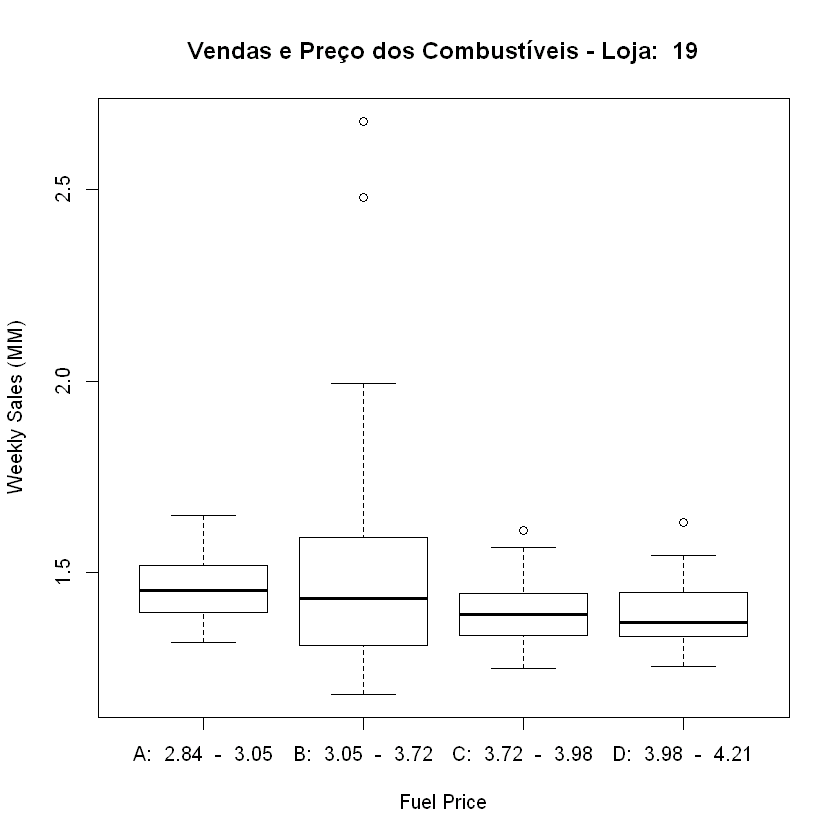

In [46]:
Q0_Fuel = min(dfplot[dfplot$Store == nstore,]$Fuel_Price)
Q1_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.25)
Q2_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.50)
Q3_Fuel = quantile(dfplot[dfplot$Store == nstore,]$Fuel_Price, 0.75)
Q4_Fuel = max(dfplot[dfplot$Store == nstore,]$Fuel_Price)
dfplot$Fuel_Quantile = ''

label_1 = paste("A: ",round(Q0_Fuel, 2)," - ",round(Q1_Fuel, 2))
label_2 = paste("B: ",round(Q1_Fuel, 2)," - ",round(Q2_Fuel, 2))
label_3 = paste("C: ",round(Q2_Fuel, 2)," - ",round(Q3_Fuel, 2))
label_4 = paste("D: ",round(Q3_Fuel, 2)," - ",round(Q4_Fuel, 2))

dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price <= Q1_Fuel,label_1, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q1_Fuel & dfplot$Fuel_Price <= Q2_Fuel ,label_2, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q2_Fuel & dfplot$Fuel_Price <= Q3_Fuel ,label_3, dfplot$Fuel_Quantile)
dfplot$Fuel_Quantile = ifelse(dfplot$Fuel_Price > Q3_Fuel,label_4, dfplot$Fuel_Quantile)

bp = boxplot(Weekly_Sales/1000000 ~ Fuel_Quantile, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Fuel Price',
        main = paste( 'Vendas e Preço dos Combustíveis - Loja: ', nstore)
       )

Fica puco clara a influência direta do preço absoluto nas vendas. 
Com mais tempo vale retornar e avaliar a influência da variação 
semanal do preço nas vendas.

In [47]:
print(bp$stats)

         [,1]     [,2]     [,3]     [,4]
[1,] 1.318344 1.181205 1.248915 1.255087
[2,] 1.395927 1.309200 1.336441 1.332719
[3,] 1.453600 1.432210 1.390122 1.368795
[4,] 1.517495 1.591104 1.445759 1.447414
[5,] 1.648883 1.993368 1.566713 1.544653


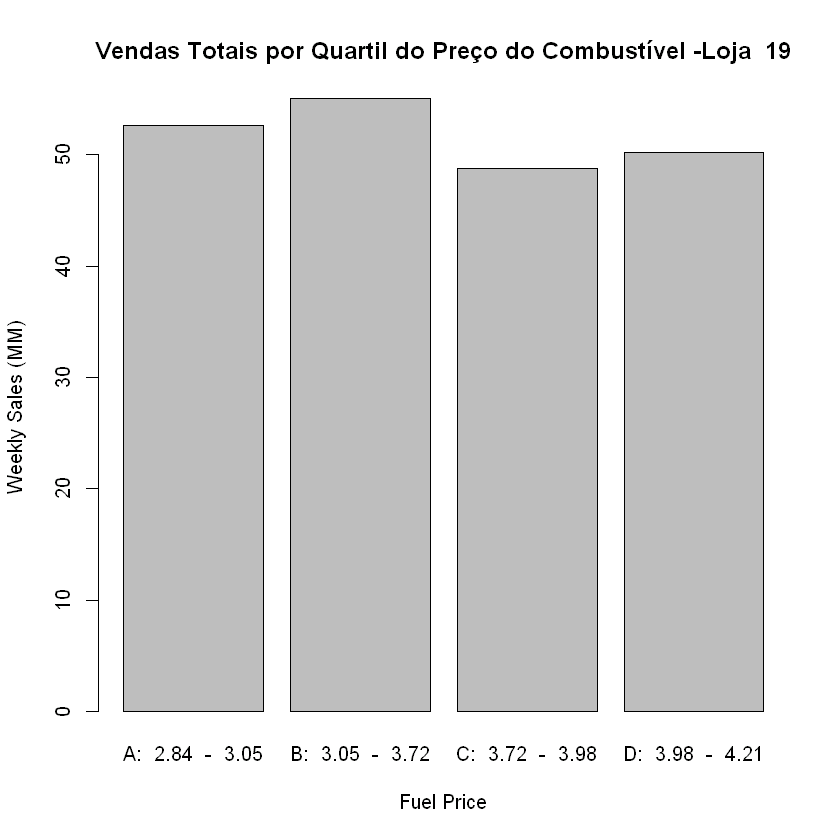

In [50]:
sums <- aggregate(Weekly_Sales ~ Fuel_Quantile, dfplot, sum)

# Create barplot
barplot(sums$Weekly_Sales/1000000, 
        names.arg = sums$Fuel_Quantile,
        main = paste("Vendas Totais por Quartil do Preço do Combustível -Loja ", nstore),
        xlab = "Fuel Price",
        ylab = "Weekly Sales (MM)"
        )